# Notebook de exploração geral dos dados

## 0. Setup

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carregar os dados

In [2]:
dados = pd.read_csv('../data/raw/aug_train.csv')

dados.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 2. Manuseio (manipulação) dos dados

In [4]:
# 1ª mudança: transformar a variável target em "0": não quer trocar e "1": quer trocar

In [5]:
# dados['target'].apply(lambda x: valor_verdadeiro if condicao else 0)

dados['target_label'] = dados['target'].apply(lambda x: 'Quer trocar' if x == 1 else 'Não quer trocar')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
 14  target_label            19158 non-null

## 3. Análise dos dados

### 3.1. Análise das variável qualitativas

**City:**

- 23% das pessoas moram na cidade 103
- 56% das pessoas moram em uma das 5 principais cidades

**Gender:**

- 69% das pessoas são do gênero masculino
- 23% das pessoas não declaram o seu gênero
- Apenas 6% das pessoas que responderam o formulário são do gênero feminino 
- 1% das pessoas possuem outro tipo de gênero, que não foi listado no formulário

**relevent_experience:**

- A grande maioria (72%) das pessoas tem experiência relevante

**enrolled_university:**

- 72% das pessoas respondentes não estão fazendo faculdade no momento
- 2% das pessoas não responderam o questionário

**education_level:**

- 60% das pessoas têm graduação
- 22% das pessoas têm mestrado
- 10,5% das pessoas têm o ensino médio “americano”
- 2,4% das pessoas têm doutorado

**major_discipline**

- 75% das pessoas respondentes são da área de Exatas (Science, Technology, Engineering, and Math)
- 14% não responderam o questionário

**experience**

- grande parte (17%) das pessoas possuem 20 ou mais anos de experiência
- verificar se o percentual de cada uma das demais categorias são próximos (gráfico)

**company_size**

- 30% das pessoas não responderam essa perguntas
    - hipótese: as pessoas não responderam por opção ou não possuem trabalho
- temos uma quantidade “próxima” de pessoas que trabalham em empresas pequenas, médias e grandes
    - ideia de feature: agrupar os valores de company_size em PP, P, M e G

**company_type**

- A maioria (51%) das pessoas que responderam o questionário trabalham em empresas privadas
- 32% das pessoas não responderam
    - ideia de feature: agrupar os valores de company_type relacionadas a startups

**last_new_job (Diferença em anos do seu último trabalho para o atual)**

- 41% das pessoas tem 1 ano de diferença entre o seu último trabalho e o  atual
- 12% das pessoas nunca ficaram sem trabalho
- 2 anos e 4 anos ou mais na diferença entre o seu último trabalho e o atual, correspondem a 32% das pessoas

In [7]:
lista_var_qual = list(dados.select_dtypes(include = [object]).columns)

In [8]:
for i in lista_var_qual:
    
    print(f'\n----- Variável utilizada: {i} \n')
    
    a = dados[i].value_counts(dropna = False).head(5)
    b = dados[i].value_counts(dropna = False, normalize = True).head(5) * 100
    
    
    c = pd.concat([a, b], axis = 1, keys = ['contagem', '%'])
    
    c['% acc'] = c['%'].cumsum()
    
    display(c)


----- Variável utilizada: city 



,contagem,%,% acc
city_103,4355,22.732018,22.732018
city_21,2702,14.103769,36.835787
city_16,1533,8.001879,44.837666
city_114,1336,6.973588,51.811254
city_160,845,4.410690,56.221944



----- Variável utilizada: gender 



,contagem,%,% acc
Male,13221,69.010335,69.010335
NaN,4508,23.530640,92.540975
Female,1238,6.462052,99.003027
Other,191,0.996973,100.000000



----- Variável utilizada: relevent_experience 



,contagem,%,% acc
Has relevent experience,13792,71.990813,71.990813
No relevent experience,5366,28.009187,100.000000



----- Variável utilizada: enrolled_university 



,contagem,%,% acc
no_enrollment,13817,72.121307,72.121307
Full time course,3757,19.610607,91.731914
Part time course,1198,6.253262,97.985176
NaN,386,2.014824,100.000000



----- Variável utilizada: education_level 



,contagem,%,% acc
Graduate,11598,60.538678,60.538678
Masters,4361,22.763336,83.302015
High School,2017,10.528239,93.830254
NaN,460,2.401086,96.231339
Phd,414,2.160977,98.392317



----- Variável utilizada: major_discipline 



,contagem,%,% acc
STEM,14492,75.644639,75.644639
NaN,2813,14.683161,90.327800
Humanities,669,3.492014,93.819814
Other,381,1.988725,95.808540
Business Degree,327,1.706859,97.515398



----- Variável utilizada: experience 



,contagem,%,% acc
>20,3286,17.152104,17.152104
5,1430,7.464245,24.616348
4,1403,7.323311,31.939660
3,1354,7.067544,39.007203
6,1216,6.347218,45.354421



----- Variável utilizada: company_size 



,contagem,%,% acc
NaN,5938,30.994885,30.994885
50-99,3083,16.092494,47.087379
100-500,2571,13.419981,60.507360
10000+,2019,10.538678,71.046038
10/49,1471,7.678255,78.724293



----- Variável utilizada: company_type 



,contagem,%,% acc
Pvt Ltd,9817,51.242301,51.242301
NaN,6140,32.049274,83.291575
Funded Startup,1001,5.224971,88.516547
Public Sector,955,4.984863,93.501409
Early Stage Startup,603,3.147510,96.648920



----- Variável utilizada: last_new_job 



,contagem,%,% acc
1,8040,41.966802,41.966802
>4,3290,17.172983,59.139785
2,2900,15.137279,74.277064
never,2452,12.798831,87.075895
4,1029,5.371124,92.447020



----- Variável utilizada: target_label 



,contagem,%,% acc
Não quer trocar,14381,75.065247,75.065247
Quer trocar,4777,24.934753,100.000000


### 3.2. Análise das variáveis quantitativas

**training_hours**:

- Segue uma distribuição exponencial. Ela tem uma grande quantidade de pessoas que têm uma baixa valor de horas treinadas 
- Esses valores mais recorrentes, estão localizados entre 0 e 48 horas treinadas (2 dias)
    - Ideia: Fazer uma feature no modelo mais recente que divide a quantidade de horas treinadas por 24 (resultados em quantos dias de treinamento ela participou)
- Em média, as pessoas fazem 65hrs de treinamento
- Quantis: 
    - 50% das pessoas assistem até 47hrs de treinamento
    - 90% das pessoas assistem até 188hrs de treinamento
    - 95% das pessoas assistem até 222hrs de treinamento

In [42]:
lista_var_quant = list(dados.drop(columns = ['enrollee_id', 'target'], axis = 1).select_dtypes(include = [int, float]).columns)

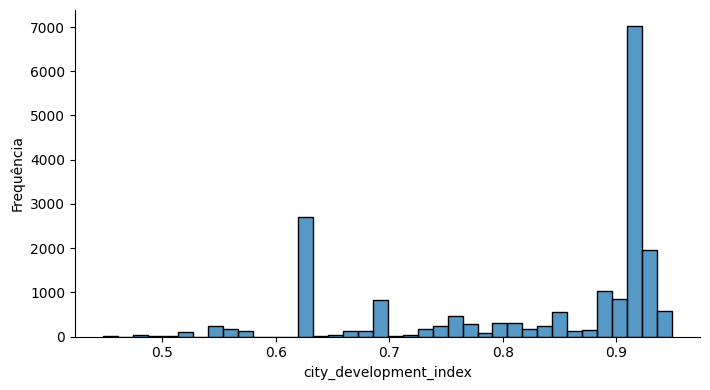

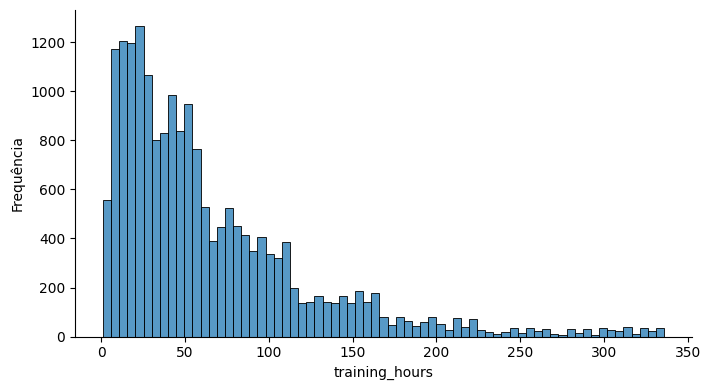

In [58]:
for i in lista_var_quant:
    
    _ = sns.displot(x = dados[i], height = 4, aspect = 1.8)
    _ = plt.xlabel(xlabel = i)
    _ = plt.ylabel(ylabel = 'Frequência')

In [31]:
dados\
    .training_hours\
    .agg(['min', 'max', 'mean', 'median'])

min         1.000000
max       336.000000
mean       65.366896
median     47.000000
Name: training_hours, dtype: float64

In [59]:
dados\
    .training_hours\
    .quantile([0.51, 0.9, 0.95, 0.97, 0.99])

0.51     48.0
0.90    146.0
0.95    188.0
0.97    222.0
0.99    302.0
Name: training_hours, dtype: float64

### 3.3. Dentro das variáveis qualitativas, abrir pela variável target

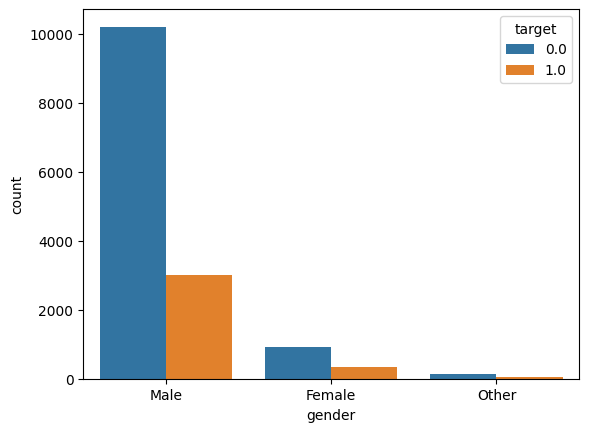

In [63]:
_ = sns.countplot(data = dados, x = 'gender', hue = 'target')

In [61]:
for i in lista_var_qual:
    
    print(f'\n----- Variável utilizada: {i} \n')
    
    a = dados[[i, 'target']].value_counts(dropna = False).head(5)
    b = dados[[i, 'target']].value_counts(dropna = False, normalize = True).head(5) * 100
    
    
    c = pd.concat([a, b], axis = 1, keys = ['contagem', '%'])
    
    display(c)


----- Variável utilizada: city 



,,contagem,%
city,target,,
city_103,0.0,3427,17.888089
city_21,1.0,1597,8.335943
city_16,0.0,1354,7.067544
city_114,0.0,1203,6.279361
city_21,0.0,1105,5.767825



----- Variável utilizada: gender 



,,contagem,%
gender,target,,
Male,0.0,10209,53.288443
NaN,0.0,3119,16.280405
Male,1.0,3012,15.721892
NaN,1.0,1389,7.250235
Female,0.0,912,4.760413



----- Variável utilizada: relevent_experience 



,,contagem,%
relevent_experience,target,,
Has relevent experience,0.0,10831,56.535129
No relevent experience,0.0,3550,18.530118
Has relevent experience,1.0,2961,15.455684
No relevent experience,1.0,1816,9.479069



----- Variável utilizada: enrolled_university 



contagem          %
enrolled_university target                     
no_enrollment       0.0        10896  56.874413
                    1.0         2921  15.246894
Full time course    0.0         2326  12.141142
                    1.0         1431   7.469464
Part time course    0.0          896   4.676897


----- Variável utilizada: education_level 



,,contagem,%
education_level,target,,
Graduate,0.0,8353,43.600585
Masters,0.0,3426,17.882869
Graduate,1.0,3245,16.938094
High School,0.0,1623,8.471657
Masters,1.0,935,4.880468



----- Variável utilizada: major_discipline 



contagem          %
major_discipline target                     
STEM             0.0        10701  55.856561
                 1.0         3791  19.788078
NaN              0.0         2264  11.817517
                 1.0          549   2.865644
Humanities       0.0          528   2.756029


----- Variável utilizada: experience 



,,contagem,%
experience,target,,
>20,0.0,2783,14.526569
5,0.0,1018,5.313707
4,0.0,946,4.937885
3,0.0,876,4.572502
6,0.0,873,4.556843



----- Variável utilizada: company_size 



,,contagem,%
company_size,target,,
NaN,0.0,3528,18.415283
50-99,0.0,2538,13.247729
NaN,1.0,2410,12.579601
100-500,0.0,2156,11.253784
10000+,0.0,1634,8.529074



----- Variável utilizada: company_type 



contagem          %
company_type   target                     
Pvt Ltd        0.0         8042  41.977242
NaN            0.0         3756  19.605387
               1.0         2384  12.443888
Pvt Ltd        1.0         1775   9.265059
Funded Startup 0.0          861   4.494206


----- Variável utilizada: last_new_job 



,,contagem,%
last_new_job,target,,
1,0.0,5915,30.874830
>4,0.0,2690,14.041132
2,0.0,2200,11.483453
1,1.0,2125,11.091972
never,0.0,1713,8.941434



----- Variável utilizada: target_label 



,,contagem,%
target_label,target,,
Não quer trocar,0.0,14381,75.065247
Quer trocar,1.0,4777,24.934753


# Próximos passos: 

1. Dentro das variáveis qualitativa, abrir pela variável target (queremos representar graficamente e não tabularmente)
2. Dentro das variáveis quantitativas, abrir pela variável target
3. Começar a procurar hipóteses
    1. Exemplo: Quem tem maior quantidade de horas no treinamento está a mais tempo na empresa